In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns

%matplotlib inline

## Задача 1

In [6]:
table = np.array([
    [13, 35, 26, 46],
    [22, 45, 48, 75],
    [18, 30, 15, 47],
    [44, 62, 56, 68]
])

Проверим $\frac{m_ik_j}{n} > 5$:

In [16]:
m = np.expand_dims(np.sum(table, axis=1), axis=-1)
k = np.sum(table, axis=0)
n = np.sum(table)
m * k / n

array([[17.90769231, 31.75384615, 26.76923077, 43.56923077],
       [28.35384615, 50.27692308, 42.38461538, 68.98461538],
       [16.41538462, 29.10769231, 24.53846154, 39.93846154],
       [34.32307692, 60.86153846, 51.30769231, 83.50769231]])

Действительно, все больше 5, значит этот критерий примерним

In [9]:
stat, pvalue, _, expected = sps.chi2_contingency(table)

In [22]:
print('pvalue = {:.4f}\nstat = {:.2f}'.format(pvalue, stat))

pvalue = 0.0613
stat = 16.28


Зависимости не наблюдается, значит

на уровне значимости 0.05 мы не отвергаем гипотезу о независимости породы коровы от жирности ее молока.

## Задача 2

In [24]:
samples = np.load('./data/hw5t2a.npy')

In [25]:
X, Y = samples[:, 0], samples[:, 1]

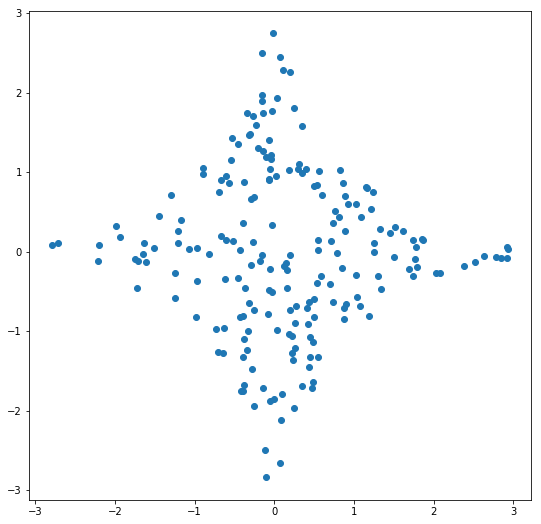

In [41]:
plt.figure(figsize=(9, 9))
plt.scatter(X, Y)
plt.show()

Очевидно, что нескорелированные, докажем это:

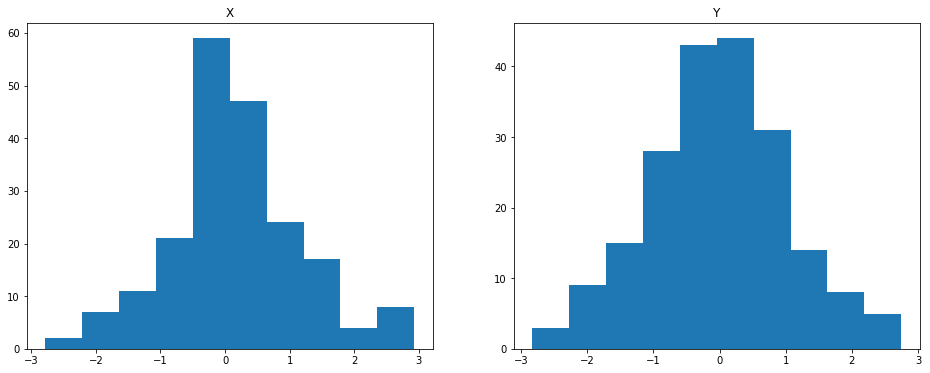

In [29]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(X)
plt.title('X')
plt.subplot(1, 2, 2)
plt.title('Y')
plt.hist(Y)
plt.show()

Выборки без очевидных выбросов, поэтому можно даже проверить и коэффициент Пирсона:

In [39]:
print('pearson: corr = {}, pval = {}'.format(*sps.pearsonr(X, Y)))
print('spearman: corr = {}, pval = {}'.format(*sps.spearmanr(X, Y)))
print('kendall: corr = {}, pval = {}'.format(*sps.kendalltau(X, Y)))

pearson: corr = -0.025961027346907174, pval = 0.715182614347085
spearman: corr = -0.04081752043801095, pval = 0.5660571738070647
kendall: corr = -0.019597989949748745, pval = 0.6802458220697412


Все три критерия на уровне значимости 0.05 отвергают гипотезу о независимости выборок. Следовательно, они зависимые

## Задача 3

In [59]:
samples = np.load('./data/hw5t3.npy')

In [60]:
names, times = samples[:, 0], samples[:, 1]

In [61]:
transformer = dict(zip(np.unique(names), range(len(np.unique(names)))))
transformer

{'Bandersnatch': 0,
 'Humpty-Dumpty': 1,
 'Mr. Fattakhov': 2,
 'Tweedledee and Tweedledum': 3}

In [62]:
names = np.array([transformer[i] for i in names])
times = np.array(times, dtype=np.float64)

Посмотрим на выборку:

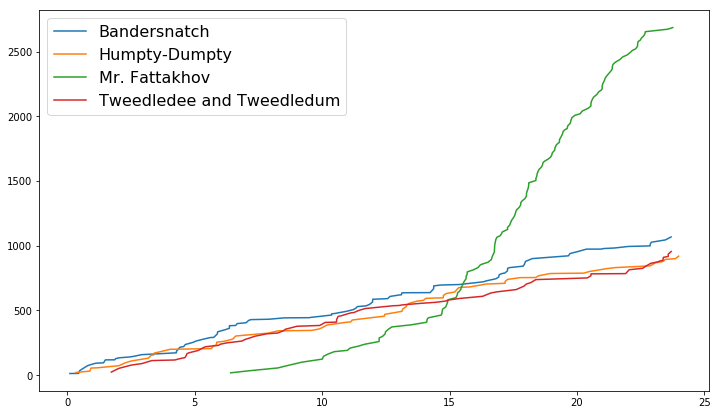

In [105]:
plt.figure(figsize=(12, 7))
for i in range(4):
    idx = np.where(names == i)
    plt.plot(sorted(times[idx]), np.cumsum(times[idx]), label=list(transformer.keys())[i])
    plt.legend(fontsize=16)
plt.show()

Видно, что некоторая зависимость все-таки есть

Разобъем временной интервал на корзины и посмотрим, сколько раз каждый человек наливал чашку чая во время, которое лежит в этой корзине:

In [64]:
times.min(), times.max()

(0.100187540905, 23.9920188238)

In [118]:
borders = np.histogram(times, bins=6)[1][1:]

In [119]:
table = np.zeros((len(transformer), len(borders)))

In [120]:
for t in range(len(times)):
    i, j = names[t], np.sum(times[t] >= borders) - 1
    table[i, j] += 1

Проверим $\frac{m_ik_j}{n} > 5$:

In [123]:
m = np.expand_dims(np.sum(table, axis=1), axis=-1)
k = np.sum(table, axis=0)
n = np.sum(table)
m * k / n

array([[12.61  , 12.125 , 18.1875, 25.9475, 19.1575,  8.9725],
       [ 9.75  ,  9.375 , 14.0625, 20.0625, 14.8125,  6.9375],
       [20.02  , 19.25  , 28.875 , 41.195 , 30.415 , 14.245 ],
       [ 9.62  ,  9.25  , 13.875 , 19.795 , 14.615 ,  6.845 ]])

Действительно, все больше 5, значит этот критерий примерним

In [124]:
stat, pvalue, _, expected = sps.chi2_contingency(table)

In [125]:
print('pvalue = {:.4f}\nstat = {:.2f}'.format(pvalue, stat))

pvalue = 0.0000
stat = 111.72


Действительно, статистическими методами получили, что гипотеза о независимости времени наполенения от того, кто ее наливает, отвергается на уровне значимости 0.05

## Задача 4

In [2]:
samples = np.load('./data/hw5t4.npy')

In [7]:
samples_df = pd.DataFrame(samples.T)

In [8]:
samples_df[:3]

,0,1,2,3,4,5,6,7,8,9
0,0.924560,-1.147607,-31.658114,-0.329901,0.524566,3.475641,-2.027473,2.007969,2.595353,-2.042226
1,0.227315,-1.487622,1.239921,1.164954,-0.464301,1.058625,-1.365418,-0.678678,7.432897,0.512889
2,0.890800,0.608649,0.310603,-1.941268,0.154973,1.066970,0.192618,2.016488,0.969415,-0.002580


Визуализация

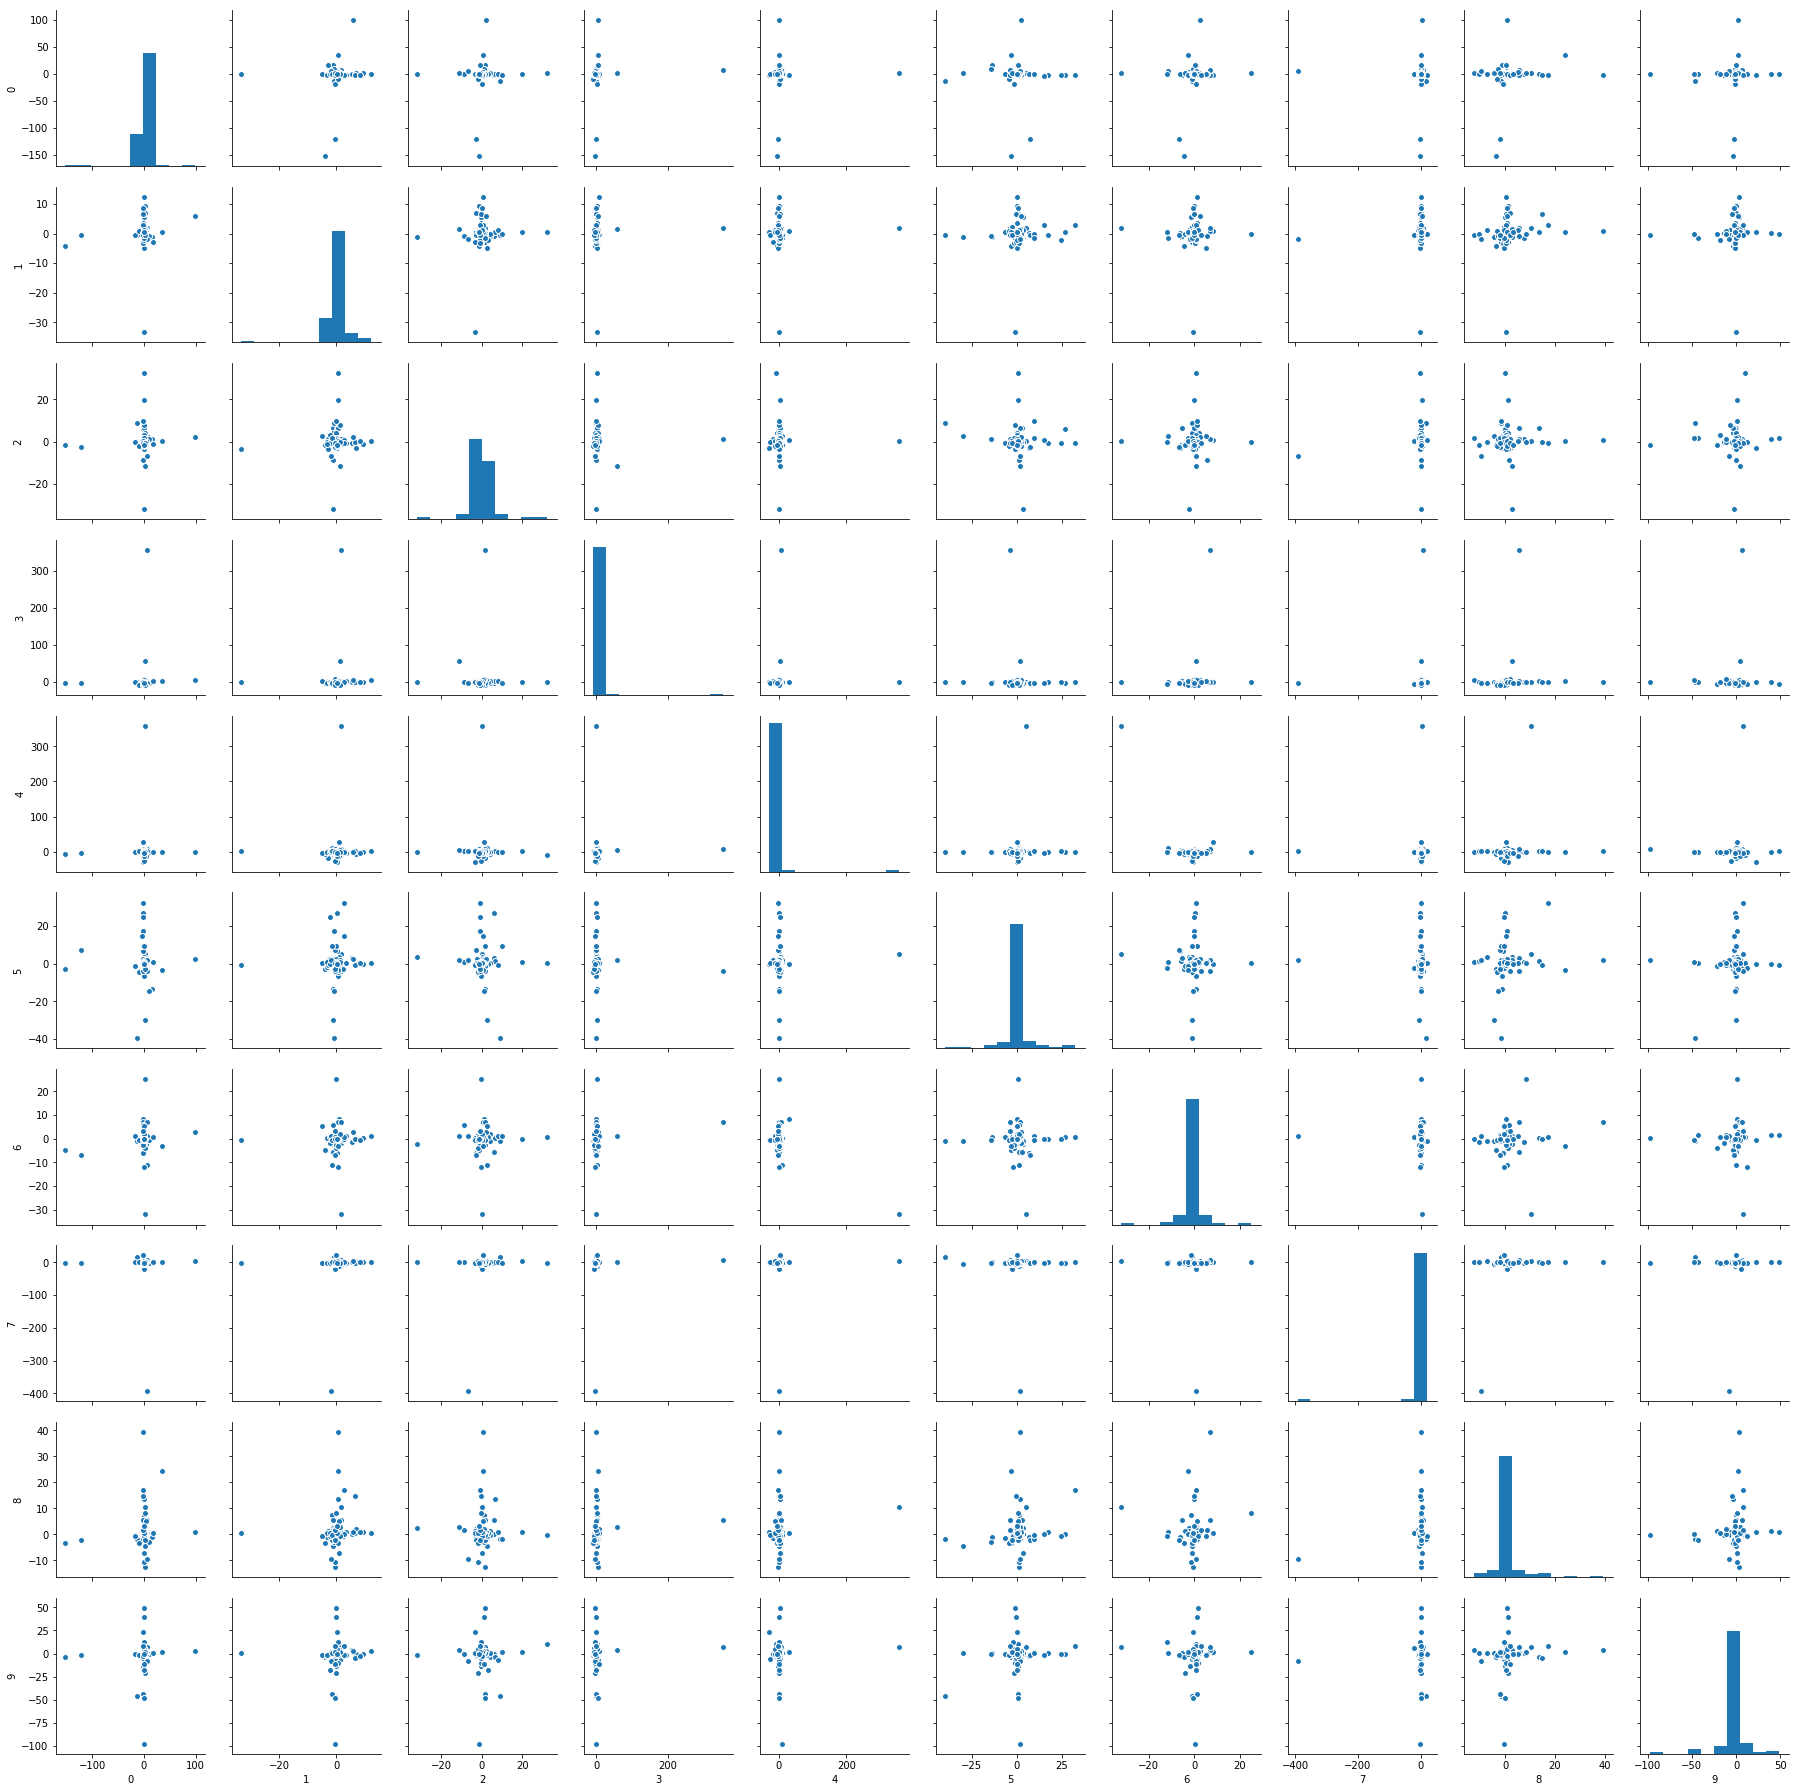

In [9]:
sns.pairplot(samples_df)

In [12]:
pearson_corr = samples_df.corr(method='pearson')
spearman_corr = samples_df.corr(method='spearman')
kendall_corr = samples_df.corr(method='kendall')

In [18]:
spearman_corr

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.082868,0.063786,0.248713,0.010693,-0.102922,0.043408,0.205161,0.142850,0.219058
1,0.082868,1.000000,0.006037,0.044500,0.003888,-0.044776,0.132361,0.191815,0.324176,0.201788
2,0.063786,0.006037,1.000000,0.199784,0.084176,-0.079508,0.172925,0.034455,-0.051797,0.051317
3,0.248713,0.044500,0.199784,1.000000,0.136130,0.065839,0.138506,0.249385,0.183210,0.098074
4,0.010693,0.003888,0.084176,0.136130,1.000000,0.109571,0.040828,0.191023,0.125461,0.103978
5,-0.102922,-0.044776,-0.079508,0.065839,0.109571,1.000000,-0.053429,0.052493,0.095890,0.030519
6,0.043408,0.132361,0.172925,0.138506,0.040828,-0.053429,1.000000,-0.004632,0.212421,0.139670
7,0.205161,0.191815,0.034455,0.249385,0.191023,0.052493,-0.004632,1.000000,0.207117,0.159952
8,0.142850,0.324176,-0.051797,0.183210,0.125461,0.095890,0.212421,0.207117,1.000000,0.226343
9,0.219058,0.201788,0.051317,0.098074,0.103978,0.030519,0.139670,0.159952,0.226343,1.000000


In [34]:
spearman_pvals = np.zeros((len(samples), len(samples)))
for i in range(10):
    for j in range(10):
        spearman_pvals[i, j] = sps.spearmanr(samples[i], samples[j])[0]

In [35]:
spearman_pvals

array([[ 1.        ,  0.08286829,  0.06378638,  0.24871287,  0.01069307,
        -0.10292229,  0.04340834,  0.20516052,  0.14285029,  0.21905791],
       [ 0.08286829,  1.        ,  0.0060366 ,  0.04450045,  0.00388839,
        -0.04477648,  0.13236124,  0.19181518,  0.32417642,  0.20178818],
       [ 0.06378638,  0.0060366 ,  1.        ,  0.19978398,  0.08417642,
        -0.07950795,  0.17292529,  0.03445545, -0.05179718,  0.05131713],
       [ 0.24871287,  0.04450045,  0.19978398,  1.        ,  0.13612961,
         0.06583858,  0.13850585,  0.24938494,  0.18321032,  0.09807381],
       [ 0.01069307,  0.00388839,  0.08417642,  0.13612961,  1.        ,
         0.10957096,  0.04082808,  0.1910231 ,  0.12546055,  0.1039784 ],
       [-0.10292229, -0.04477648, -0.07950795,  0.06583858,  0.10957096,
         1.        , -0.05342934,  0.05249325,  0.09588959,  0.03051905],
       [ 0.04340834,  0.13236124,  0.17292529,  0.13850585,  0.04082808,
        -0.05342934,  1.        , -0.00463246

In [36]:
multipletests(pvals=spearman_pvals, alpha=0.05)

(array([[False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False]]),
 array([[ 1.        ,  1.        ,  0.86165908,  1.        ,  1.        ,
          1.        ,  1.        ,

In [16]:
is_wrong, _, _, _ = multipletests(pvals=kendall_corr.values, alpha=0.05)

In [17]:
is_wrong

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

Из множественной проверки гипотез мы можем сказать, что выборки независимые в совокупности